# Differential event rate


$$
\frac{dR}{dE_R} = \frac{\rho_0}{m_\chi m_N} \int_{v_\text{min}}^{v_\text{max}} v f(v) \frac{d\sigma}{dE_R} dv
$$

The differential event rate gives the number of expected events per kg material per a unit energy and is of essential importance for direct dark matter detections. It predicts what a possible signal would look like in a detector.

## Velocity density distribution 

The three dimensional velocity function follows a Maxwell function
$$
f_{gal}(\textbf{v}) = \frac{1}{\sqrt{2 \pi}\sigma_{v}} \exp \left(\frac{-|\textbf{v}|^2 } {2\sigma_{v}^2}\right)
$$

However, this assumes a static reference frame. In reality the detector is located on the Earth, which rotates, orbits the Sun and moves with the Sun through the Galaxy. This influences the velocity distribution observed at Earth. Since most Dark Matter direct detectors measure for a long time, it is a reasonable approximation to look at just the movement of the Sun through the Galaxy, which is $v_\text{Earth} = 220 \pm 20$ km/s. [1]

$$
 f(\mathbf{v}) = f_\text{Gal}(\mathbf{v}-\mathbf{v}_\text{Earth})
$$

Furthermore, the current detectors are not direction dependent. Therefore, the velocity distribution can be rewritten as a speed distribution. For the uncorrected veloctiy function this becomes:

$$
 f_{gal}(v) \text{ ~ } v^2 \exp \left(\frac{-|v|^2}{2\sigma_{v}^2} \right)
$$

Once we introduce the correction of the earth the calculation becomes more complex. 

$$
 f(v) = \int\int d\theta  \frac{1}{\sqrt{2 \pi}\sigma_v}\exp \left( \frac{-|\textbf{v}-\textbf{v}_\text{Earth}|}{2\sigma_v^2} \right) d\cos\theta 
$$

$$
 f(v) = \int\int d\theta  \frac{1}{\sqrt{2 \pi}\sigma_v}\exp \left( \frac{-v^2-v_\text{Earth}^2+2v_\text{Earth}v\cos \theta}{2\sigma_v^2} \right) d\cos\theta 
$$

$$
f(v) =2 \pi \frac{1}{\sqrt{2 \pi}\sigma_v}v^2\exp \left( \frac{-v^2-v_\text{Earth}^2}{2\sigma_v^2} \right) \int \exp \left( \frac{2 v_\text{Earth}v \cos \theta}{2 \sigma_v^2}  \right) d\cos \theta
$$

If we wish to contnue we have to look at the limits for the $\cos \theta$ integration. 

<b>Insert integration limit </b>

This results in the Standard Halo Model, where the slope of the higher energy particles extends further compared to a gaussian. 

$$
f(v) = 0, \quad \quad \mbox{if } v>v_\text{esc}+v_e 
$$

$$
f(v) = \frac{v}{\sqrt{2 \pi}\sigma_v v_e N_\text{esc}} \left( \exp \left[-\frac{(v-v_e)^2}{2\sigma_v^2} \right] - \exp \left[-\frac{(v-v_e)^2}{2\sigma_v^2} \right]   \right), \quad \mbox{if } v<v_\text{esc}-v_e
$$

$$
f(v) = \frac{v}{\sqrt{2 \pi}\sigma_v v_e N_\text{esc}} \left( \exp \left[-\frac{(v-v_e)^2}{2\sigma_v^2} \right] - \exp \left[-\frac{v_\text{esc}^2}{2\sigma_v^2} \right]   \right), \quad \mbox{Otherwise.}
$$


[1] F. J. Kerr and D. Lynden-Bell, “Review of galactic constants,” Mon. Not. Roy. Astron. Soc., vol. 221, p. 1023, 1986.



In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import special,integrate
from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [10]:
velocity = np.linspace(0,2000,1000)
sigma = 270.  #km/s
v_esc = 550.
v_e = 220.

In [11]:
def N_esc(v_esc, sigma):
    a = v_esc**2/(2*sigma**2)
    return special.erf(np.sqrt(a))  - np.sqrt(2/np.pi) * v_esc/sigma *np.exp(-a)

In [13]:
def speed_dist(v, v_e, sigma, v_esc):
    factor = v / (np.sqrt(np.pi*2)*sigma*v_e*N_esc(v_esc, sigma))
    
    if v > v_esc+v_e:
        return 0 
    elif v < v_esc-v_e:
        return factor*(np.exp(-(v-v_e)**2/(2*sigma**2)) - np.exp(-(v+v_e)**2/(2*sigma**2)))
    else:
        return factor*(np.exp(-(v-v_e)**2/(2*sigma**2)) - np.exp(-v_esc**2/(2*sigma**2)))

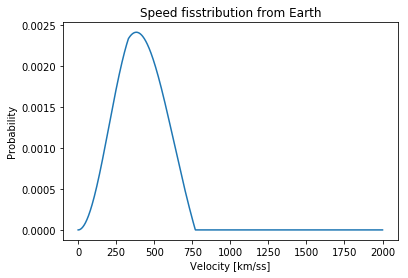

In [15]:
plt.plot(velocity, [speed_dist(i, v_e, sigma, v_esc) for i in velocity])
plt.title(r"Speed fisstribution from Earth")
plt.ylabel(r"Probability")
plt.xlabel(r"Velocity [km/s]")
plt.show()

## Interaction cross section

The interaction cross section can be split into an spin-dependent and spin-independent. We will first look at the spin-independent part.

$$
 \frac{d\sigma}{dE_R} = \frac{d\sigma_\text{SD}}{dE_R} + \frac{d\sigma_\text{SI}}{dE_R}
$$

Assuming the interaction strength of the neutron-DM and proton-DM is the same, the spin-independent part can be written as: 

$$
\frac{d\sigma_\text{SI}}{dE_R} = \frac{m_N \sigma_p^\text{SI}}{2\mu_{\chi p}^2 v^2} A^2 F^2_\text{SI}(E_R),
$$
where 

- $m_N$: the mass of the nucleus
- $\sigma_p^\text{SI}$: the interaction strength at zero momentum
- $\mu_{\chi p}$ the reduced mass of the proton-WIMP system ($=\frac{m_\chi m_p}{m_\chi+m_p}$)
- $A$ the atomic mass number of the target
- $F$ the form factor correction

## Form Factor

Due to the particle wavelength being smaller than the radius of the proton, the cross section has to be corrected to be smaller. This is done using a parametrisation: the Helm form. 

$$
F^2_\text{SI}(E_R) = \left[ \frac{3 j_1(qR_1)}{qR_1}\right]^2 e^{-q^2 s^2}
$$
with 
$$
q = \sqrt{2 m_N E_R}, 
$$
and R_1 comes from spectroscopy data. 

$$
R_1 = \sqrt{c^2 +\frac{7}{3}\pi^2 a^2 - 5s^2}
$$

$$
c = 1.23 A^{1/3}-0.60 \text{ fm}
$$

$$
a = 0.52 \text{ fm}
$$

$$
s = 0.9 \text{ fm}
$$


[2] B.J. Kavanagh, M Fornasa, A.M. Green, "Probing WIMP particle physics and astrophysics with direct detection and neutrino telescope data", Phys. Rev., vol. 91, issue 10  

In [43]:
def FSquared(E_R, A):
    """
    Calculate the form factor given an recoil energy and atomic mass number using the Helm parameterisation. 
    
    Input: 
    - E_R   Recoil Energy
    - A:    Atomic mass number 
    
    Output: 
    - Form Factor
    """
    m = 1.672621898*10**(-27)      #kg
    s = 0.9
    a = 0.52
    c = 1.23*A**(1/3) - 0.60
    R1 = np.sqrt(c**2 + 7/3 * np.pi**2 *a**2  - 5*s**2)
    q = np.sqrt(2*m*R1) 
    j_n = special.spherical_jn(1,q*R1)
    out = (3*j_n/(q*R1))**2*math.exp(-q**2*s**2)
    print(m,s,a,c,R1,q,j_n,out)
    return out

1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52

1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52

1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52

1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52

1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52

1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52 5.63093033349409 5.821034171358601 1.395448976066175e-13 2.7076520580228453e-13 0.99999999999999
1.672621898e-27 0.9 0.52

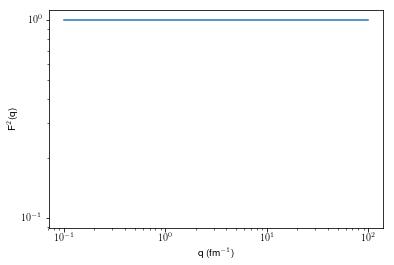

In [45]:
x=np.linspace(0.1,100,1000)
y=[FSquared(q,130) for q in x]

plt.loglog(x,y)
plt.xlabel("q (fm$^{-1}$)")
plt.ylabel("F$^2$(q)")
plt.show()

If just the spin-independent part is considered the event rate can be split into a speed-dependent and speed-independent part. The speed-dependent part of the interaction rate can be rewritten as: 

$$
\eta(v_{min}) = \frac{1}{2v_e N_\text{esc}}
\begin{cases} 
    0 & \mbox{if } v>v_\text{esc} + v_\text{e} \\ 
    \text{erf}[\alpha_+]-\text{erf}[\alpha_-]-2\frac{v_e}{\sigma_v}\sqrt{\frac{2}{\pi}} \exp \left(-\alpha_\text{esc}^2 \right) & \mbox{if } v < v_\text{esc}+ v_\text{e}  \\
    \text{erf}[\alpha_\text{esc}]-\text{erf}[\alpha_-] - \frac{v_\text{esc}+v_\text{e}-v_\text{min}}{\sigma_v}\sqrt{\frac{2}{\pi}}\exp \left(-\alpha_\text{esc}^2 \right) & \mbox{otherwise}
\end{cases}
$$
with 

$$
\alpha_\pm(v_\text{min}) = \frac{v_\text{min} \pm v_\text{e}}{\sqrt{2}\sigma_v} \mbox{ and } \alpha_\text{esc} = \frac{v_\text{esc}}{\sqrt{2}\sigma_v}
$$

This can also be writen as:

$$
\eta(v_\text{min}) = \frac{1}{2v_\text{e}N_\text{esc}} \left(\text{erf}[\tilde \alpha_+] - \text{erf}[\tilde \alpha_-] - \frac{2}{\sqrt{\pi}} (\tilde \alpha_+ - \tilde \alpha_-) \exp[-\alpha^2_\text{esc}] \right)
$$
where 

$$
\tilde \alpha_\pm(v_\text{min}) = min(\alpha_\pm, \alpha_\text{esc})
$$


# Form Factor

In [ ]:
def FSquared(E_R, A):
    s=1
    R=1.2*math.sqrt(A)
    R1=math.sqrt(R**2-5*s**2)
    j_n=special.spherical_jn(1,E_R*R1)
    return (3*j_n/(E_R*R1))**2*math.exp(-E_R**2*s**2)

In [ ]:
FSquared(5,130)

In [ ]:
x=np.linspace(0.1,2,1000)
y=[FSquared(q,130) for q in x]

plt.loglog(x,y)
plt.xlabel("q (fm$^{-1}$)")
plt.ylabel("F$^2$(q)")
plt.show()

\begin{align}
    \sigma_0 &= \dfrac{4\mu_N^2}{\pi}\left[Zf^p+(A-Z)f^n\right]^2\\
    \sigma_{0,P} &= \dfrac{4\mu_N^2}{\pi} \left(f^p\right)^2\\
    \left(f^p\right)^2 &= \dfrac{\pi}{4\mu_N^2} \sigma_{0,P}
\end{align}
where $\mu_N=m_\chi m_N/\left(m_\chi+m_N\right)$

\begin{align}f^p&=f^n\\\sigma_0 &= \dfrac{4\mu_N^2}{\pi}\left[Zf^p+(A-Z)f^p\right]^2 \\&= \dfrac{4\mu_N^2}{\pi}\left[A f^p\right]^2\\&=\dfrac{4\mu_N^2A^2}{\pi}\left[f^p\right]^2\\
&=\dfrac{4\mu_N^2A^2}{\pi}\dfrac{\pi}{4\mu_N^2} \sigma_{0,P}\\
&=A^2\sigma_{0,P}\end{align}

In [ ]:
A=130
m_N = A*1.660539E-27 #kg
m_chi = 100 * 1.780E-27 #kg
mu_N = m_chi*m_N/(m_chi+m_N) #kg
#2*m_N*A**2*f_p**2/(math.pi*v**2)*FSquared(q)

In [ ]:
f_p_2 = math.pi/(4*mu_N**2)
print(f_p_2)

In [ ]:
def dSigma_dER(E_R,v):
    #f_p = math.pi/(4*mu_N**2) # * SIGMA_0,P
    sigma_0 = A**2 # * SIGMA_0,P
    return m_N*sigma_0/(2*mu_N**2*v**2)*FSquared(E_R,A)

In [ ]:
dSigma_dER(5,4E4)

In [ ]:
x1=np.linspace(0.1,2,1000)
y1=[dSigma_dER(q,4E4) for q in x1]

plt.loglog(x1,y1)
plt.show()

In [ ]:
x2=np.logspace(0,5,1000)
y2=[dSigma_dER(1.2,v) for v in x2]

plt.loglog(x2,y2)
plt.show()

\begin{align}
    &R = \int_{E_T}^\infty dE_R\dfrac{\rho_0}{m_Nm_\chi}\int_{v_{min}}^\infty vf(v)\dfrac{d\sigma_{WN}}{dE_R}dv\\
    &v_{min} = \sqrt{\dfrac{m_NE_R}{2\mu_N^2}}\\
    &\mu_N = \dfrac{m_\chi m_N}{m_\chi + m_N}
\end{align}

In [ ]:
E_R=1.2

# New try

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import special,integrate
from matplotlib import rc

In [ ]:
def N_esc(v_esc, sigma):
    a = v_esc**2/(2*sigma**2)
    return special.erf(np.sqrt(a))  - np.sqrt(2/np.pi) * v_esc/sigma *np.exp(-a)

def speed_dist(v, v_e, sigma, v_esc):
    factor = v / (np.sqrt(np.pi*2)*sigma*v_e*N_esc(v_esc, sigma))
    
    if v > v_esc+v_e:
        return 0 
    elif v < v_esc-v_e:
        return factor*(np.exp(-(v-v_e)**2/(2*sigma**2)) - np.exp(-(v+v_e)**2/(2*sigma**2)))
    else:
        return factor*(np.exp(-(v-v_e)**2/(2*sigma**2)) - np.exp(-v_esc**2/(2*sigma**2)))

In [ ]:
A=130 # Atomic mass number
m_N = A*1.660539E-27 #kg. Mass of detector target
m_chi = 100 * 1.780E-27 #kg. Mass of WIMP
mu_N = m_chi*m_N/(m_chi+m_N) #kg. Reduced mass
sigma = 270 #km/s
v_e = 220 #km/s
v_esc = 550 #km/s

def pdf(v):
    return 1/ np.sqrt(2*np.pi*sigma**2) * np.exp(- np.abs(v)**2 / (2* sigma**2))

def vmin(E_R=np.nan):
    v_min = math.sqrt(m_N*E_R/(2*mu_N**2))
    return v_min

In [ ]:
def FSquared2(E_R, A):
    s=1 #fm
    R=1.2*math.sqrt(A) #fm
    R1=math.sqrt(R**2-5*s**2) #fm
    j_n=special.spherical_jn(1,E_R*R1) #No unit
    return (3*j_n/(E_R*R1))**2*math.exp(-E_R**2*s**2) #No unit

In [ ]:
def dSigma_dE_SI(E_R,v):
    sigma_0 = A**2 #sigma_0,proton
    return m_N*sigma_0*FSquared2(E_R,A)/(2*mu_N**2*v**2) #sigma_0,proton / Joule

\begin{align} R = \int_{E_T}^\infty dE_R\dfrac{\rho_0}{m_Nm_\chi}\int_{v_{min}}^\infty vf(v)\dfrac{d\sigma_{WN}}{dE_R}dv \end{align}

In [ ]:
def integrant(E_R,v):
    integr = v*speed_dist(v, v_e, sigma, v_esc)*dSigma_dE_SI(E_R,v)
    return integr

In [ ]:
#integrant(4,4)


In [ ]:
#E_T = 4*1.6021773E-22
#integrate.dblquad(integrant, E_T, 100*1.6021773E-22, lambda x:vmin(x), lambda x:v_esc)

In [ ]:
R = 0
start = 4*1.6021773E-22
finish = 100*1.6021773E-10
steps = 10000
dE = (finish-start)/steps
ER_list = np.linspace(start, finish, steps)
for E in ER_list:
    integr = integrate.quad(lambda v: integrant(E,v),vmin(E),v_esc)
    R += integr[0] * dE
    
print("R =%.2g x SIGMA_0,proton"%(R))

In [ ]:
R_oud=R

In [ ]:
(R-R_oud)/R